<a href="https://colab.research.google.com/github/pulkitrajput147/ML-projects/blob/master/Project_Checking_The_Strength_of_Password.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Password - 670k unique values for password collected online**

**Strength - three values(0 , 1 , 2) i.e. 0 for weak, 1 for medium, 2 for strong.**
**Strength of the password based on rules(such as containing digits, special symbols , etc.)**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
df=pd.read_csv('/content/data.csv',',',error_bad_lines=False)

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

In [ ]:
df.shape

(669640, 2)

In [ ]:
df.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669640 entries, 0 to 669639
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   password  669639 non-null  object
 1   strength  669640 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 10.2+ MB


In [ ]:
df.dropna(inplace=True)

In [ ]:
# Checking whether the dataset is balanced or not
df['strength'].value_counts()

1    496801
0     89701
2     83137
Name: strength, dtype: int64

In [ ]:
from sklearn.utils import shuffle

In [ ]:
df=shuffle(df)

In [ ]:
Y=df['strength']
X=df['password']

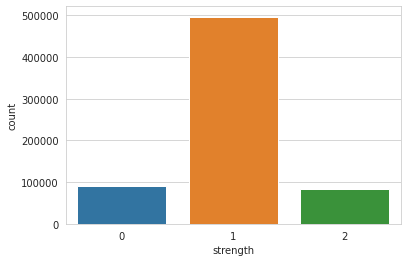

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='strength',data=df)

In [ ]:
def words_to_char(inputs):
  characters=[]
  for i in inputs:
    characters.append(i)
  return characters  

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(tokenizer=words_to_char)
X=vectorizer.fit_transform(X)

<669639x153 sparse matrix of type '<class 'numpy.float64'>'
	with 5645406 stored elements in Compressed Sparse Row format>

In [ ]:
X.shape

(669639, 153)

In [ ]:
vectorizer.vocabulary_

{'\x01': 0,
 '\x02': 1,
 '\x04': 2,
 '\x05': 3,
 '\x06': 4,
 '\x08': 5,
 '\x0e': 6,
 '\x0f': 7,
 '\x10': 8,
 '\x11': 9,
 '\x12': 10,
 '\x13': 11,
 '\x16': 12,
 '\x17': 13,
 '\x18': 14,
 '\x19': 15,
 '\x1b': 16,
 '\x1c': 17,
 '\x1d': 18,
 '\x1e': 19,
 ' ': 20,
 '!': 21,
 '"': 22,
 '#': 23,
 '$': 24,
 '%': 25,
 '&': 26,
 '(': 27,
 ')': 28,
 '*': 29,
 '+': 30,
 '-': 31,
 '.': 32,
 '/': 33,
 '0': 34,
 '1': 35,
 '2': 36,
 '3': 37,
 '4': 38,
 '5': 39,
 '6': 40,
 '7': 41,
 '8': 42,
 '9': 43,
 ';': 44,
 '<': 45,
 '=': 46,
 '>': 47,
 '?': 48,
 '@': 49,
 '[': 50,
 '\\': 51,
 ']': 52,
 '^': 53,
 '_': 54,
 '`': 55,
 'a': 56,
 'b': 57,
 'c': 58,
 'd': 59,
 'e': 60,
 'f': 61,
 'g': 62,
 'h': 63,
 'i': 64,
 'j': 65,
 'k': 66,
 'l': 67,
 'm': 68,
 'n': 69,
 'o': 70,
 'p': 71,
 'q': 72,
 'r': 73,
 's': 74,
 't': 75,
 'u': 76,
 'v': 77,
 'w': 78,
 'x': 79,
 'y': 80,
 'z': 81,
 '{': 82,
 '|': 83,
 '}': 84,
 '~': 85,
 '\x7f': 86,
 '\x81': 87,
 '\x8d': 88,
 '\xa0': 89,
 '¡': 90,
 '¢': 91,
 '¤': 92,
 '¦': 9

In [ ]:
df.iloc[0][0]

'gapeju136'

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

In [ ]:
model=LogisticRegression(penalty='l2',multi_class='ovr')
model.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(model.score(X_test,Y_test))

0.8106967923063139


In [ ]:
model1=LogisticRegression(random_state=0,solver='saga',multi_class='multinomial')
model1.fit(X_train,Y_train)
print(model1.score(X_test,Y_test))

0.81841735858073


In [ ]:
X_predict=np.array(["DaniDaniels@johnnysins"])
X_predict=vectorizer.transform(X_predict)
y_pred=model1.predict(X_predict)
if(y_pred==1):
  print("moderate")
elif(y_pred==0):
  print("weak")
else:
  print("strong")


strong
